### Импорт всех модулей

In [155]:
import matplotlib.pyplot as plt
import numpy as np
from dmitry_karatyshchev_v3 import *
from time import time

%config InlineBackend.figure_format = 'svg'

params = {'amin': 75, 'amax': 90, 'bmin': 500, 'bmax': 600,
          'p1': 0.1, 'p2': 0.01, 'p3': 0.3, 'N': 50}
models = [3, 4]

### Нахождение основных статистик для априорных распределений 

In [16]:
def mean_a(params, model):
    return (params['amin'] + params['amax']) / 2


def mean_b(params, model):
    return (params['bmin'] + params['bmax']) / 2


def variance_a(params, model):
    return ((params['amax'] - params['amin'] + 1) ** 2 - 1) / 12


def variance_b(params, model):
    return ((params['bmax'] - params['bmin'] + 1) ** 2 - 1) / 12


def mean_cn(params, model):
    return params['p1'] * mean_a(params, model) + params['p2'] * mean_b(params, model)


def variance_cn(params, model):
    p1 = params['p1']
    p2 = params['p2']
    if model == 3:
        return p1 * (1 - p1) * variance_a(params, model) + p2 * (1 - p2) * variance_b(params, model)
    elif model == 4:
        return (p1 ** 2) * variance_a(params, model) + (p2 ** 2) * variance_b(params, model)
    return 
    

def mean_dn(params, model):
    p3 = params['p3']
    return (1 + p3) * mean_cn(params, model)


def variance_dn(params, model):
    p3 = params['p3']
    return (p3 ** 2) * ((1 - p3) ** 2) * variance_cn(params, model)

In [17]:
functions = [mean_a, mean_b, mean_cn, mean_dn, variance_a, variance_b, variance_cn, variance_dn]

for model in models:
    print(f"Model number {model} is running...")
    for func in functions:
        print(f'{func.__name__} result is {func(params, model)}')
    print()

Model number 3 is running...
mean_a result is 82.5
mean_b result is 550.0
mean_cn result is 13.75
mean_dn result is 17.875
variance_a result is 21.25
variance_b result is 850.0
variance_cn result is 10.3275
variance_dn result is 0.45544274999999995

Model number 4 is running...
mean_a result is 82.5
mean_b result is 550.0
mean_cn result is 13.75
mean_dn result is 17.875
variance_a result is 21.25
variance_b result is 850.0
variance_cn result is 0.29750000000000004
variance_dn result is 0.01311975



Видно, что основная разница между моделями заключается в дисперсии $c_n$ и $d_n$

### Генерация выборки $d_1, d_2, \ldots, d_N$

In [43]:
# Генерация выборки для первого эксперимента

a_first = np.array([round(mean_a(params, 3))])
b_first = np.array([round(mean_b(params, 3))])

d1_samples3 = generate(params['N'], a_first, b_first, params, 3).reshape(1, -1)
d1_samples4 = generate(params['N'], a_first, b_first, params, 4).reshape(1, -1)

d2_samples3 = np.array([round(mean_dn(params, 3))] * params['N']).reshape(1, -1)
d2_samples4 = np.array([round(mean_dn(params, 4))] * params['N']).reshape(1, -1)

In [44]:
print(f'Первый эксперимент, третья модель: {d1_samples3}')
print(f'Первый эксперимент, четвёртая модель: {d1_samples4}')
print(f'Второй эксперимент, третья модель: {d2_samples3}')
print(f'Второй эксперимент, четвёртая модель: {d2_samples4}')

Первый эксперимент, третья модель: [[24 20 17 17 17 28 19 19 21 20 13 17 15 22 18 17 14 19 13 18 19 18 17 25
  22 23 25 19 19 18 26 22 18 19 21 15 14 13 17 17 25  9 16 15 18 21 24 19
  24 13]]
Первый эксперимент, четвёртая модель: [[12 22 12 16 17 15 15  8 15 11 11 15 14 26 18 24 21 14 12 22 21 21 20 11
  19 23 12 19 32 15 29 11 19 18 14 20 21 30 19 21 15 22 21 19 20 23 18 25
  15 12]]
Второй эксперимент, третья модель: [[18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18
  18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18
  18 18]]
Второй эксперимент, четвёртая модель: [[18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18
  18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18
  18 18]]


### Первый эксперимент. Анализ апостериорных вероятностей для уточнения прогноза величины b. Все значения $d$ генерируются при a и b, равных своим математическим ожиданиям, округлённым до целого числа.

In [51]:
# Рассмотрим изначально априорное распределение на b. Оно одинаково для обеих моделей.
pb(params, 3)

(array([0.00990099, 0.00990099, 0.00990099, 0.00990099, 0.00990099,
        0.00990099, 0.00990099, 0.00990099, 0.00990099, 0.00990099,
        0.00990099, 0.00990099, 0.00990099, 0.00990099, 0.00990099,
        0.00990099, 0.00990099, 0.00990099, 0.00990099, 0.00990099,
        0.00990099, 0.00990099, 0.00990099, 0.00990099, 0.00990099,
        0.00990099, 0.00990099, 0.00990099, 0.00990099, 0.00990099,
        0.00990099, 0.00990099, 0.00990099, 0.00990099, 0.00990099,
        0.00990099, 0.00990099, 0.00990099, 0.00990099, 0.00990099,
        0.00990099, 0.00990099, 0.00990099, 0.00990099, 0.00990099,
        0.00990099, 0.00990099, 0.00990099, 0.00990099, 0.00990099,
        0.00990099, 0.00990099, 0.00990099, 0.00990099, 0.00990099,
        0.00990099, 0.00990099, 0.00990099, 0.00990099, 0.00990099,
        0.00990099, 0.00990099, 0.00990099, 0.00990099, 0.00990099,
        0.00990099, 0.00990099, 0.00990099, 0.00990099, 0.00990099,
        0.00990099, 0.00990099, 0.00990099, 0.00

#### Анализ третьей модели, без a

Посмотрим, как изменятся вероятности, если уточнить знание о $d_1$. То есть выведем $p(b | d_1)$

In [54]:
pb_d1_distrib, _ = pb_d(d1_samples3[..., :1], params, 3)
pb_d1_distrib = pb_d1_distrib.reshape(-1)
print(pb_d1_distrib)

[0.008347   0.00837743 0.00840789 0.00843838 0.00846889 0.00849944
 0.00853001 0.00856061 0.00859124 0.00862189 0.00865257 0.00868327
 0.008714   0.00874476 0.00877553 0.00880634 0.00883716 0.00886801
 0.00889889 0.00892978 0.0089607  0.00899164 0.0090226  0.00905359
 0.00908459 0.00911561 0.00914666 0.00917772 0.0092088  0.0092399
 0.00927102 0.00930216 0.00933332 0.00936449 0.00939568 0.00942689
 0.00945811 0.00948935 0.0095206  0.00955187 0.00958315 0.00961445
 0.00964576 0.00967708 0.00970842 0.00973977 0.00977113 0.00980251
 0.00983389 0.00986529 0.00989669 0.00992811 0.00995954 0.00999097
 0.01002242 0.01005387 0.01008533 0.0101168  0.01014828 0.01017976
 0.01021125 0.01024275 0.01027425 0.01030576 0.01033727 0.01036879
 0.01040031 0.01043184 0.01046337 0.0104949  0.01052643 0.01055797
 0.0105895  0.01062104 0.01065258 0.01068412 0.01071566 0.0107472
 0.01077874 0.01081028 0.01084181 0.01087335 0.01090488 0.01093641
 0.01096793 0.01099945 0.01103097 0.01106248 0.01109399 0.011125

Теперь добавим $d_2$

In [55]:
pb_d1d2_distrib, _ = pb_d(d1_samples3[..., :2], params, 3)
pb_d1d2_distrib = pb_d1d2_distrib.reshape(-1)
print(pb_d1d2_distrib)

[0.00784813 0.00788787 0.00792767 0.00796753 0.00800745 0.00804744
 0.00808748 0.00812758 0.00816774 0.00820796 0.00824823 0.00828856
 0.00832894 0.00836938 0.00840987 0.00845041 0.008491   0.00853164
 0.00857233 0.00861307 0.00865385 0.00869468 0.00873556 0.00877648
 0.00881744 0.00885845 0.00889949 0.00894058 0.0089817  0.00902287
 0.00906407 0.00910531 0.00914658 0.00918789 0.00922923 0.0092706
 0.009312   0.00935344 0.0093949  0.00943639 0.00947791 0.00951946
 0.00956103 0.00960263 0.00964424 0.00968588 0.00972755 0.00976923
 0.00981093 0.00985265 0.00989438 0.00993614 0.0099779  0.01001968
 0.01006148 0.01010328 0.0101451  0.01018692 0.01022875 0.01027059
 0.01031244 0.01035429 0.01039615 0.01043801 0.01047987 0.01052173
 0.0105636  0.01060546 0.01064732 0.01068917 0.01073102 0.01077287
 0.01081471 0.01085654 0.01089836 0.01094017 0.01098197 0.01102376
 0.01106553 0.01110729 0.01114904 0.01119076 0.01123247 0.01127417
 0.01131584 0.01135749 0.01139911 0.01144072 0.0114823  0.01152

Можно заметить, что вероятности меньших значений уменьшаются, а больших - увеличиваются. Теперь проверим на всей выборке $d$

In [60]:
pb_d_distrib, val_d = pb_d(d1_samples3, params, 3)
pb_d_distrib = pb_d_distrib.reshape(-1)
print(pb_d_distrib)

[0.00411614 0.00421745 0.00432005 0.00442394 0.00452909 0.00463549
 0.00474309 0.00485189 0.00496186 0.00507296 0.00518518 0.00529848
 0.00541283 0.0055282  0.00564456 0.00576188 0.00588011 0.00599924
 0.00611922 0.00624001 0.00636158 0.00648389 0.00660689 0.00673056
 0.00685484 0.0069797  0.0071051  0.00723099 0.00735732 0.00748406
 0.00761116 0.00773858 0.00786626 0.00799417 0.00812226 0.00825048
 0.00837878 0.00850711 0.00863544 0.00876371 0.00889187 0.00901988
 0.00914768 0.00927524 0.00940249 0.0095294  0.00965592 0.00978199
 0.00990758 0.01003262 0.01015708 0.01028091 0.01040406 0.01052649
 0.01064815 0.01076898 0.01088896 0.01100803 0.01112614 0.01124326
 0.01135934 0.01147434 0.01158821 0.01170091 0.01181241 0.01192266
 0.01203162 0.01213925 0.01224551 0.01235036 0.01245378 0.01255571
 0.01265613 0.01275499 0.01285228 0.01294794 0.01304195 0.01313428
 0.01322488 0.01331375 0.01340084 0.01348612 0.01356956 0.01365115
 0.01373085 0.01380863 0.01388447 0.01395835 0.01403025 0.0141

Вероятно, дальше тенденция сохранится. Посчитаем среднее значение и дисперсию, а также проанализируем все апостериорные вероятности

In [63]:
# Определим функции для подсчёта математического ожидания и дисперсии

def get_mean(values, probs):
    return np.average(values, weights=probs)


def get_variance(values, probs):
    mean = get_mean(values, probs)
    return np.average((values - mean) ** 2, weights=probs)


# Проверка
print(f'Полная апостериорная вероятность | [MEAN = {get_mean(val_d, pb_d_distrib)}] | [VARIANCE = {get_variance(val_d, pb_d_distrib)}]')

Полная апостериорная вероятность | [MEAN = 559.6911127905339] | [VARIANCE = 738.8286999872697]


In [77]:
means_pb_d_3 = [mean_b(params, 3)]
variances_pb_d_3 = [variance_b(params, 3)]

for i in range(1, params['N'] + 1):
    distrib, val_d = pb_d(d1_samples3[..., :i], params, 3)
    distrib = distrib.reshape(-1)
    means_pb_d_3.append(get_mean(val_d, distrib))
    variances_pb_d_3.append(get_variance(val_d, distrib))

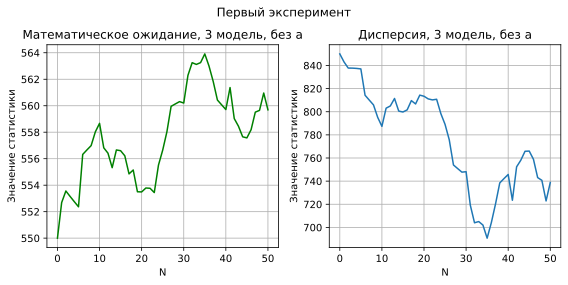

In [143]:
# Нарисуем графики

titles = ['Математическое ожидание, 3 модель, без a', 'Дисперсия, 3 модель, без a']

fig, ax = plt.subplots(1, 2, figsize=(8, 4))
fig.suptitle('Первый эксперимент')
ax[0].plot(means_pb_d_3, color='green')
ax[1].plot(variances_pb_d_3)
for i in range(2):
    ax[i].grid(True)
    ax[i].set_xlabel('N')
    ax[i].set_ylabel('Значение статистики')
    ax[i].set_title(titles[i])
plt.tight_layout()
plt.subplots_adjust(top=0.85) 
plt.show()


#### Анализ четвёртой модели, без a

In [99]:
means_pb_d_4 = [mean_b(params, 3)]
variances_pb_d_4 = [variance_b(params, 3)]

for i in range(1, params['N'] + 1):
    distrib, val_d = pb_d(d1_samples4[..., :i], params, 3)
    distrib = distrib.reshape(-1)
    means_pb_d_4.append(get_mean(val_d, distrib))
    variances_pb_d_4.append(get_variance(val_d, distrib))

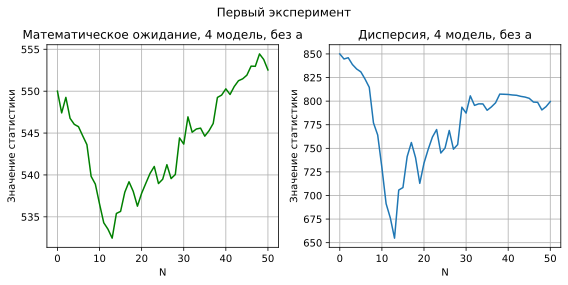

In [146]:
# Нарисуем графики

titles = ['Математическое ожидание, 4 модель, без a', 'Дисперсия, 4 модель, без a']

fig, ax = plt.subplots(1, 2, figsize=(8, 4))
fig.suptitle('Первый эксперимент')
ax[0].plot(means_pb_d_4, color='green')
ax[1].plot(variances_pb_d_4)
for i in range(2):
    ax[i].grid(True)
    ax[i].set_xlabel('N')
    ax[i].set_ylabel('Значение статистики')
    ax[i].set_title(titles[i])
plt.tight_layout()
plt.subplots_adjust(top=0.85) 
plt.show()


#### Анализ третьей модели, с учётом a

In [118]:
means_pb_ad_3 = [mean_b(params, 3)]
variances_pb_ad_3 = [variance_b(params, 3)]
a_parameter = np.array([round(mean_a(params, 3))])

for i in range(1, params['N'] + 1):
    distrib, val_d = pb_ad(a_parameter, d1_samples3[..., :i], params, 3)
    distrib = distrib.reshape(-1)
    means_pb_ad_3.append(get_mean(val_d, distrib))
    variances_pb_ad_3.append(get_variance(val_d, distrib))

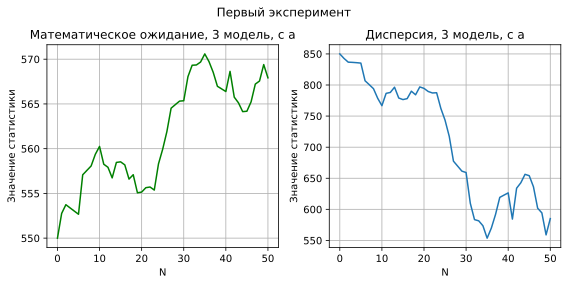

In [147]:
titles = ['Математическое ожидание, 3 модель, c a', 'Дисперсия, 3 модель, с a']

fig, ax = plt.subplots(1, 2, figsize=(8, 4))
fig.suptitle('Первый эксперимент')
ax[0].plot(means_pb_ad_3, color='green')
ax[1].plot(variances_pb_ad_3)
for i in range(2):
    ax[i].grid(True)
    ax[i].set_xlabel('N')
    ax[i].set_ylabel('Значение статистики')
    ax[i].set_title(titles[i])
plt.tight_layout()
plt.subplots_adjust(top=0.85) 
plt.show()

#### Анализ четвёртой модели, с учётом a

In [121]:
means_pb_ad_4 = [mean_b(params, 4)]
variances_pb_ad_4 = [variance_b(params, 4)]
a_parameter = np.array([round(mean_a(params, 4))])

for i in range(1, params['N'] + 1):
    distrib, val_d = pb_ad(a_parameter, d1_samples4[..., :i], params, 3)
    distrib = distrib.reshape(-1)
    means_pb_ad_4.append(get_mean(val_d, distrib))
    variances_pb_ad_4.append(get_variance(val_d, distrib))

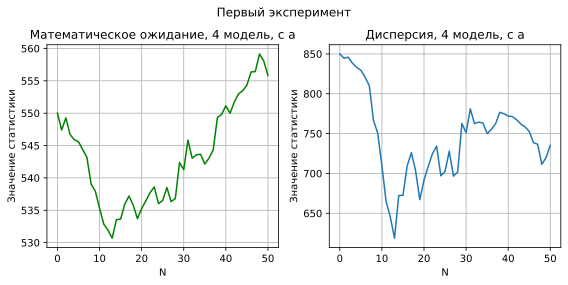

In [148]:
titles = ['Математическое ожидание, 4 модель, c a', 'Дисперсия, 4 модель, с a']

fig, ax = plt.subplots(1, 2, figsize=(8, 4))
fig.suptitle('Первый эксперимент')
ax[0].plot(means_pb_ad_4, color='green')
ax[1].plot(variances_pb_ad_4)
for i in range(2):
    ax[i].grid(True)
    ax[i].set_xlabel('N')
    ax[i].set_ylabel('Значение статистики')
    ax[i].set_title(titles[i])
plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()

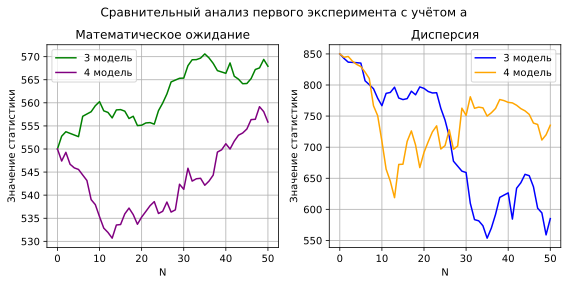

In [123]:
titles = ['Математическое ожидание', 'Дисперсия']

fig, ax = plt.subplots(1, 2, figsize=(8, 4))

ax[0].plot(means_pb_ad_3, color='green', label='3 модель')
ax[0].plot(means_pb_ad_4, color='purple', label='4 модель')
ax[1].plot(variances_pb_ad_3, color='blue', label='3 модель')
ax[1].plot(variances_pb_ad_4, color='orange', label='4 модель')
for i in range(2):
    ax[i].grid(True)
    ax[i].set_xlabel('N')
    ax[i].set_ylabel('Значение статистики')
    ax[i].set_title(titles[i])
    ax[i].legend()
fig.suptitle('Сравнительный анализ первого эксперимента с учётом a')
plt.tight_layout()
plt.subplots_adjust(top=0.85) 
plt.show()

#### Итоговый график

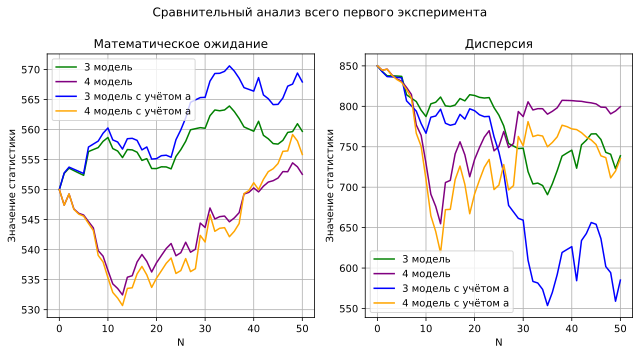

In [126]:
titles = ['Математическое ожидание', 'Дисперсия']

fig, ax = plt.subplots(1, 2, figsize=(9, 5))

ax[0].plot(means_pb_d_3, color='green', label='3 модель')
ax[0].plot(means_pb_d_4, color='purple', label='4 модель')
ax[1].plot(variances_pb_d_3, color='green', label='3 модель')
ax[1].plot(variances_pb_d_4, color='purple', label='4 модель')

ax[0].plot(means_pb_ad_3, color='blue', label='3 модель с учётом a')
ax[0].plot(means_pb_ad_4, color='orange', label='4 модель с учётом a')
ax[1].plot(variances_pb_ad_3, color='blue', label='3 модель с учётом a')
ax[1].plot(variances_pb_ad_4, color='orange', label='4 модель с учётом a')

for i in range(2):
    ax[i].grid(True)
    ax[i].set_xlabel('N')
    ax[i].set_ylabel('Значение статистики')
    ax[i].set_title(titles[i])
    ax[i].legend()
fig.suptitle('Сравнительный анализ всего первого эксперимента')
plt.tight_layout()
plt.subplots_adjust(top=0.85) 
plt.show()

Можно выявить следующие вещи:

- Наблюдается тенденция повышения среднего значения и понижения дисперсии для величины $b$
- Графики достаточно зашумлены в силу случайного семплирования $d_i$
- Уточнение знания об $a$ сильно влияет на среднее и дисперсию апостериорного распределения. Видно, что модели без данного параметра слабее уточняют распределение на $b$ в силу более высокой дисперсии и того, что, несмотря на одинаковую тенденцию к повышению, график математического ожидания у данных моделей ниже, чем у моделей с уточнённым параметром $a$.
- Замена суммы биномиальных распределений пуассоновским хорошо заметна - это видно по резкому спаду среднего значения на первых, примерно, $10$ значений $N$, а также по более высокой дисперсии, нежели у 3 модели с биномиальными распределениями на $c_n$. Это, в целом, легко объяснимо, так как замена 3 модели на 4-ю отражается именно в изменении дисперсии на $c_n$ и $d_n$, что можно было видеть в сводке статистик для априорных распределений выше
- Лучшей себя показывает 3-я модель с уточнённым параметром $a$ 

### Второй эксперимент. Анализ апостериорных вероятностей для уточнения прогноза величины b. Все значения $d$ равны своему математическому ожиданию, округлённому до целого числа.

#### Анализ 3-й модели, без учёта a

In [127]:
means_pb_d_3eq = [mean_b(params, 3)]
variances_pb_d_3eq = [variance_b(params, 3)]

for i in range(1, params['N'] + 1):
    distrib, val_d = pb_d(d2_samples3[..., :i], params, 3)
    distrib = distrib.reshape(-1)
    means_pb_d_3eq.append(get_mean(val_d, distrib))
    variances_pb_d_3eq.append(get_variance(val_d, distrib))

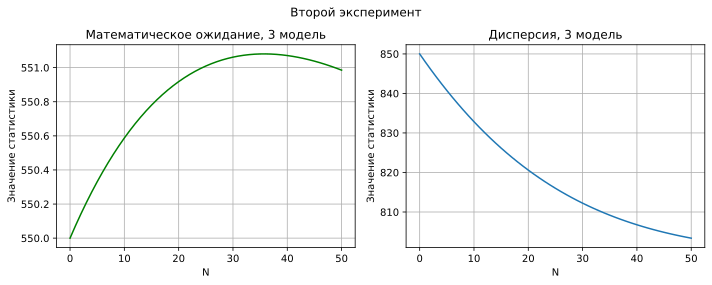

In [149]:
titles = ['Математическое ожидание, 3 модель', 'Дисперсия, 3 модель']

fig, ax = plt.subplots(1, 2, figsize=(10, 4))
fig.suptitle('Второй эксперимент')
ax[0].plot(means_pb_d_3eq, color='green')
ax[1].plot(variances_pb_d_3eq)
for i in range(2):
    ax[i].grid(True)
    ax[i].set_xlabel('N')
    ax[i].set_ylabel('Значение статистики')
    ax[i].set_title(titles[i])
plt.tight_layout()
plt.subplots_adjust(top=0.85) 
plt.show()

#### Анализ 4-й модели, без учёта a

In [130]:
means_pb_d_4eq = [mean_b(params, 4)]
variances_pb_d_4eq = [variance_b(params, 4)]

for i in range(1, params['N'] + 1):
    distrib, val_d = pb_d(d2_samples4[..., :i], params, 4)
    distrib = distrib.reshape(-1)
    means_pb_d_4eq.append(get_mean(val_d, distrib))
    variances_pb_d_4eq.append(get_variance(val_d, distrib))

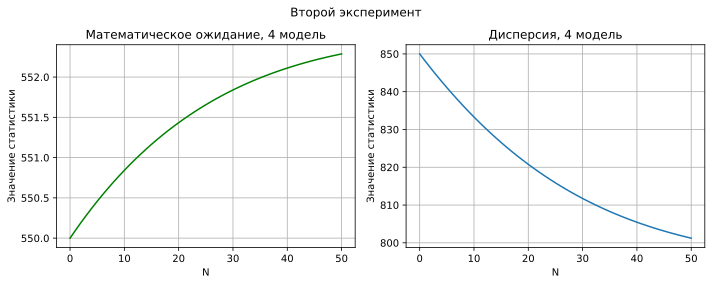

In [150]:
titles = ['Математическое ожидание, 4 модель', 'Дисперсия, 4 модель']

fig, ax = plt.subplots(1, 2, figsize=(10, 4))
fig.suptitle('Второй эксперимент')
ax[0].plot(means_pb_d_4eq, color='green')
ax[1].plot(variances_pb_d_4eq)
for i in range(2):
    ax[i].grid(True)
    ax[i].set_xlabel('N')
    ax[i].set_ylabel('Значение статистики')
    ax[i].set_title(titles[i])
plt.tight_layout()
plt.subplots_adjust(top=0.85) 
plt.show()

#### Анализ 3-й модели, с учётом a

In [133]:
means_pb_ad_3eq = [mean_b(params, 3)]
variances_pb_ad_3eq = [variance_b(params, 3)]

a_parameter = np.array([round(mean_a(params, 3))])

for i in range(1, params['N'] + 1):
    distrib, val_d = pb_ad(a_parameter, d2_samples3[..., :i], params, 3)
    distrib = distrib.reshape(-1)
    means_pb_ad_3eq.append(get_mean(val_d, distrib))
    variances_pb_ad_3eq.append(get_variance(val_d, distrib))

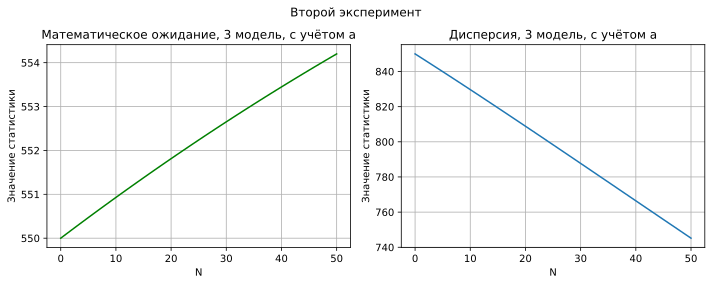

In [151]:
titles = ['Математическое ожидание, 3 модель, с учётом a', 'Дисперсия, 3 модель, с учётом a']

fig, ax = plt.subplots(1, 2, figsize=(10, 4))
fig.suptitle('Второй эксперимент')
ax[0].plot(means_pb_ad_3eq, color='green')
ax[1].plot(variances_pb_ad_3eq)
for i in range(2):
    ax[i].grid(True)
    ax[i].set_xlabel('N')
    ax[i].set_ylabel('Значение статистики')
    ax[i].set_title(titles[i])
plt.tight_layout()
plt.subplots_adjust(top=0.85) 
plt.show()

#### Анализ 4-й модели, с учётом a

In [137]:
means_pb_ad_4eq = [mean_b(params, 4)]
variances_pb_ad_4eq = [variance_b(params, 4)]

a_parameter = np.array([round(mean_a(params, 4))])

for i in range(1, params['N'] + 1):
    distrib, val_d = pb_ad(a_parameter, d2_samples4[..., :i], params, 4)
    distrib = distrib.reshape(-1)
    means_pb_ad_4eq.append(get_mean(val_d, distrib))
    variances_pb_ad_4eq.append(get_variance(val_d, distrib))

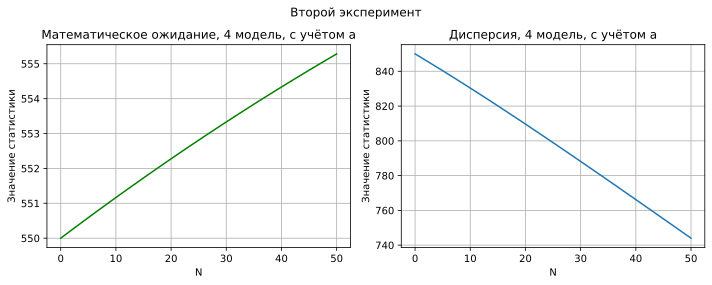

In [152]:
titles = ['Математическое ожидание, 4 модель, с учётом a', 'Дисперсия, 4 модель, с учётом a']

fig, ax = plt.subplots(1, 2, figsize=(10, 4))
fig.suptitle('Второй эксперимент')
ax[0].plot(means_pb_ad_4eq, color='green')
ax[1].plot(variances_pb_ad_4eq)
for i in range(2):
    ax[i].grid(True)
    ax[i].set_xlabel('N')
    ax[i].set_ylabel('Значение статистики')
    ax[i].set_title(titles[i])
plt.tight_layout()
plt.subplots_adjust(top=0.85) 
plt.show()

#### Итоговый график

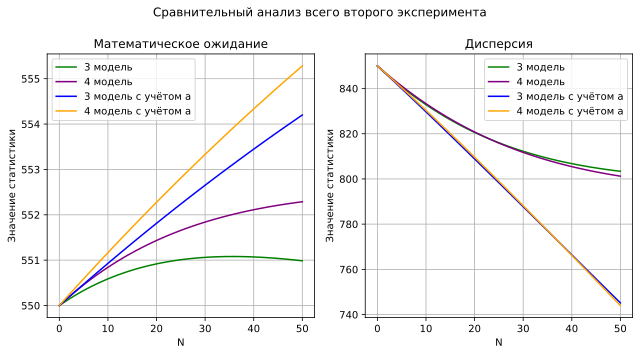

In [139]:
titles = ['Математическое ожидание', 'Дисперсия']

fig, ax = plt.subplots(1, 2, figsize=(9, 5))

ax[0].plot(means_pb_d_3eq, color='green', label='3 модель')
ax[0].plot(means_pb_d_4eq, color='purple', label='4 модель')
ax[1].plot(variances_pb_d_3eq, color='green', label='3 модель')
ax[1].plot(variances_pb_d_4eq, color='purple', label='4 модель')

ax[0].plot(means_pb_ad_3eq, color='blue', label='3 модель с учётом a')
ax[0].plot(means_pb_ad_4eq, color='orange', label='4 модель с учётом a')
ax[1].plot(variances_pb_ad_3eq, color='blue', label='3 модель с учётом a')
ax[1].plot(variances_pb_ad_4eq, color='orange', label='4 модель с учётом a')

for i in range(2):
    ax[i].grid(True)
    ax[i].set_xlabel('N')
    ax[i].set_ylabel('Значение статистики')
    ax[i].set_title(titles[i])
    ax[i].legend()
fig.suptitle('Сравнительный анализ всего второго эксперимента')
plt.tight_layout()
plt.subplots_adjust(top=0.85) 
plt.show()

Замечены следующие основные тенденции:

- Уточнение знания о $d_i$ и $a$ увеличивает математическое ожидание количества студентов непрофильных факультетов $(b)$ и уменьшает дисперсию данной величины, что делает каждое следующее апостериорное распределение более определённым, с меньшей энтропией.
- Знание $a$ - числа студентов профильного факультета - преобразует график почти в линейный. При этом без данной величины графики словно выходят на плато с большим значением $N$
- В отличие от случайного семплирования $d_i$, данные графики гладкие, незашумлённые.
- Уточнение апостериорного распределения действительно отражает то, насколько хорошо мы знаем рассматриваемую модель. 
- Сильной разницы между 3 и 4 моделями здесь не наблюдается

### Временная оценка подсчёта всех необходимых распределений

Найдём время, затрачиваемое на подсчёт следующих необходимых распределений: $$p(c_n), p(d_n); \\ p(b | d_1), \ldots, p(b | d_1, \ldots, d_N); \\ p(b | a, d_1), \ldots, p(b | a, d_1, \ldots, d_N)$$

In [158]:
# P(c_n)
start_time = time()
pc(params, 3)
cn_3_endtime = time() - start_time

start_time = time()
pc(params, 4)
cn_4_endtime = time() - start_time

print(f"p(c_n): [3 | {cn_3_endtime:.3f} seconds], [4 | {cn_4_endtime:.3f} seconds]")

p(c_n): [3 | 0.092 seconds], [4 | 0.213 seconds]


In [159]:
# P(d_n)
start_time = time()
pd(params, 3)
dn_3_endtime = time() - start_time

start_time = time()
pd(params, 4)
dn_4_endtime = time() - start_time

print(f"p(d_n): [3 | {dn_3_endtime:.3f} seconds], [4 | {dn_4_endtime:.3f} seconds]")

p(d_n): [3 | 0.258 seconds], [4 | 0.347 seconds]


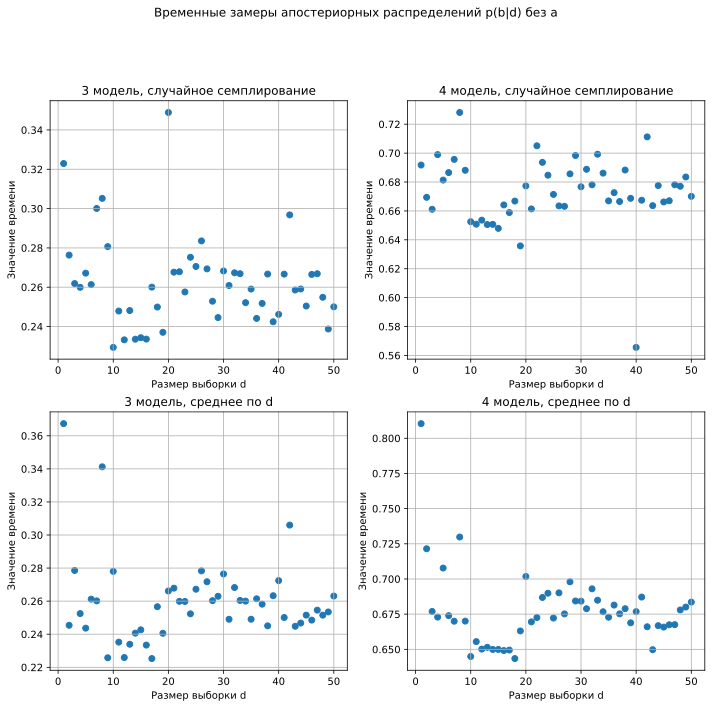

In [167]:
pb_d_times13 = []
pb_d_times14 = []
pb_d_times23 = []
pb_d_times24 = []

for i in range(1, params['N'] + 1):
    start_time = time()
    pb_d(d1_samples3[..., :i], params, 3)
    pb_d_times13.append(time() - start_time)

    start_time = time()
    pb_d(d1_samples4[..., :i], params, 4)
    pb_d_times14.append(time() - start_time)

    start_time = time()
    pb_d(d2_samples3[..., :i], params, 3)
    pb_d_times23.append(time() - start_time)

    start_time = time()
    pb_d(d2_samples4[..., :i], params, 4)
    pb_d_times24.append(time() - start_time)


fig, axes = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle('Временные замеры апостериорных распределений p(b|d) без a')

titles = [['3 модель, случайное семплирование', '4 модель, случайное семплирование'], 
          ['3 модель, среднее по d', '4 модель, среднее по d']]

times_list = [[pb_d_times13, pb_d_times14], 
              [pb_d_times23, pb_d_times24]]

for i in range(2):
    for j in range(2):        
        axes[i][j].scatter(np.arange(1, params['N'] + 1), times_list[i][j])
        axes[i][j].grid(True)
        axes[i][j].set_title(titles[i][j])
        axes[i][j].set_xlabel('Размер выборки d')
        axes[i][j].set_ylabel('Значение времени')
plt.tight_layout()
plt.subplots_adjust(top=0.85) 
plt.show()

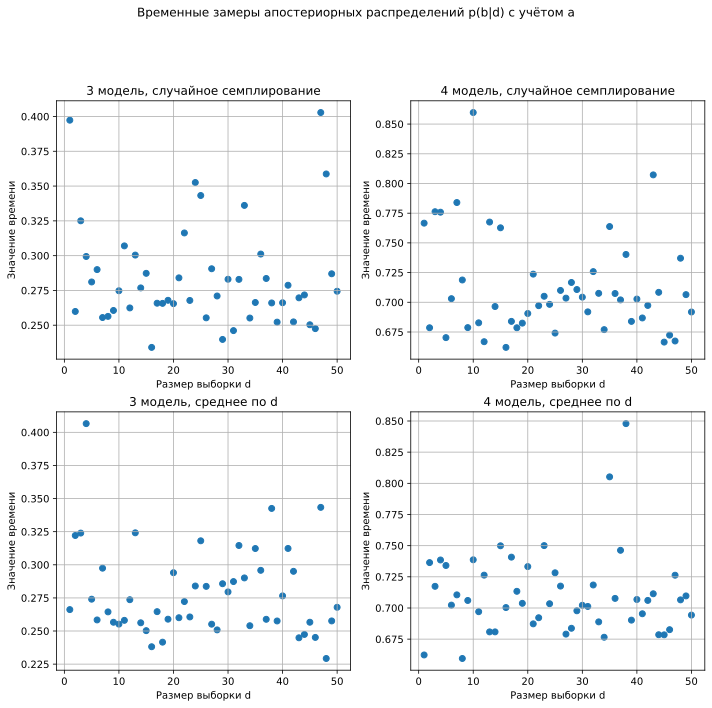

In [169]:
pb_ad_times13 = []
pb_ad_times14 = []
pb_ad_times23 = []
pb_ad_times24 = []

for i in range(1, params['N'] + 1):
    start_time = time()
    pb_ad(a_parameter, d1_samples3[..., :i], params, 3)
    pb_ad_times13.append(time() - start_time)

    start_time = time()
    pb_ad(a_parameter, d1_samples4[..., :i], params, 4)
    pb_ad_times14.append(time() - start_time)

    start_time = time()
    pb_ad(a_parameter, d2_samples3[..., :i], params, 3)
    pb_ad_times23.append(time() - start_time)

    start_time = time()
    pb_ad(a_parameter, d2_samples4[..., :i], params, 4)
    pb_ad_times24.append(time() - start_time)

fig, axes = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle('Временные замеры апостериорных распределений p(b|d) с учётом a')

titles = [['3 модель, случайное семплирование', '4 модель, случайное семплирование'], 
          ['3 модель, среднее по d', '4 модель, среднее по d']]

times_list = [[pb_ad_times13, pb_ad_times14], 
              [pb_ad_times23, pb_ad_times24]]

for i in range(2):
    for j in range(2):        
        axes[i][j].scatter(np.arange(1, params['N'] + 1), times_list[i][j])
        axes[i][j].grid(True)
        axes[i][j].set_title(titles[i][j])
        axes[i][j].set_xlabel('Размер выборки d')
        axes[i][j].set_ylabel('Значение времени')
plt.tight_layout()
plt.subplots_adjust(top=0.85) 
plt.show()

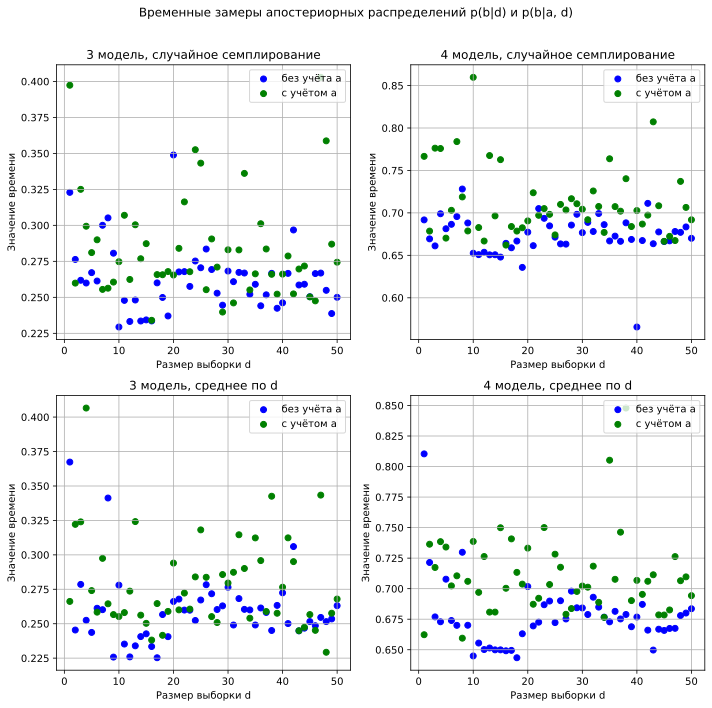

In [177]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle('Временные замеры апостериорных распределений p(b|d) и p(b|a, d)')

titles = [['3 модель, случайное семплирование', '4 модель, случайное семплирование'], 
          ['3 модель, среднее по d', '4 модель, среднее по d']]

times_list = [[(pb_d_times13, pb_ad_times13), (pb_d_times14, pb_ad_times14)], 
              [(pb_d_times23, pb_ad_times23), (pb_d_times24, pb_ad_times24)]]

for i in range(2):
    for j in range(2):        
        axes[i][j].scatter(np.arange(1, params['N'] + 1), times_list[i][j][0], color='blue', label='без учёта a')
        axes[i][j].scatter(np.arange(1, params['N'] + 1), times_list[i][j][1], color='green', label='с учётом a')
        axes[i][j].grid(True)
        axes[i][j].set_title(titles[i][j])
        axes[i][j].set_xlabel('Размер выборки d')
        axes[i][j].set_ylabel('Значение времени')
        axes[i][j].legend(loc='upper right')
plt.tight_layout()
plt.subplots_adjust(top=0.9) 
plt.show()

### Сравнение двух моделей

По результатам экспериментов видно, что 3 модель, несмотря на свой более "сложный" вид в силу суммы биномиальных распределений, выглядит более предпочтительной. Подсчёт $p(c_n)$ в виде свёртки оказывается даже быстрее, нежели подсчёт того же распределения для 4-й модели. Результаты следующие: $p(c_n) - [3 \ модель \ | \ 0.092 \ seconds], \ [4 \ модель \ | \ 0.213 \ seconds]$. Оценка распределения $p(d_n)$ тоже оказалась быстрее - $0.258$ секунд для третьей модели и $0.347$ секунд - для второй.

По графикам оценки времени апостериорных распределений, третья модель тоже выигрывает почти в два раза.

Случайное семплирование значений $d_i$ показывает, что 3 модель лучше подходит под тенденцию увеличения математического ожидания, а также снижения дисперсии оценки $b$. В случае с взятием среднего по $d_i$ видно, что обе модели не сильно отличаются друг от друга, а больше влияет знание о величине $a$.

Также важно отметить, что 3-я модель более подходит под действительность, так как бесконечное число студентов - это всего лишь абстракция, которую в реальной жизни наблюдать не получится. 

В целом результат того, что 3-я модель лучше 4-й, легко объясним неудачной аппроксимацией Пуасоновским распределением, ибо наша модель и здравый смысл не подразумевают бесконечного количества студентов двух факультетов. Касательно времени вычисления - вероятно, операция свёртки реализована более оптимальным способом, что делает её более быстрой для подсчёта распределения $p(c_n)$